## Transfer Learning Inception V3 using Keras

Dataset can be found in the following url - https://data.mendeley.com/datasets/tywbtsjrjv/1

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [256,256]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 3s 0us/step


In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
train_path = '/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/train'
valid_path = '/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/val'
test_path = '/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/test'


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/train/*')

In [8]:
len(folders)

3

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen =ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2100 images belonging to 3 classes.


In [16]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (256,256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False)

Found 600 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

<ipython-input-18-e63160ae6cfd>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
66/66 [==============================] - 750s 11s/step - loss: 1.1770 - accuracy: 0.8352 - val_loss: 0.3130 - val_accuracy: 0.9300
Epoch 2/20
66/66 [==============================] - 38s 572ms/step - loss: 0.3039 - accuracy: 0.9510 - val_loss: 0.1392 - val_accuracy: 0.9733
Epoch 3/20
66/66 [==============================] - 39s 585ms/step - loss: 0.5861 - accuracy: 0.9262 - val_loss: 0.9260 - val_accuracy: 0.8867
Epoch 4/20
66/66 [==============================] - 40s 602ms/step - loss: 0.4201 - accuracy: 0.9552 - val_loss: 0.1186 - val_accuracy: 0.9800
Epoch 5/20
66/66 [==============================] - 37s 562ms/step - loss: 0.2614 - accuracy: 0.9652 - val_loss: 0.2446 - val_accuracy: 0.9633
Epoch 6/20
66/66 [==============================] - 38s 571ms/step - loss: 0.2119 - accuracy: 0.9657 - val_loss: 0.4043 - val_accuracy: 0.9433
Epoch 7/20
66/66 [==============================] - 39s 596ms/step - loss: 0.3050 - accuracy: 0.9586 - val_loss: 0.2155 - val_accuracy: 0.9667


In [19]:
import matplotlib.pyplot as plt

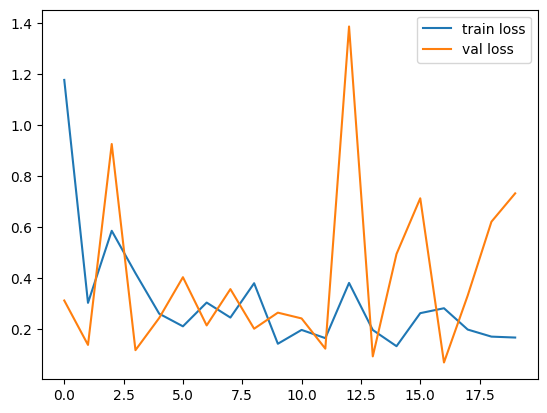

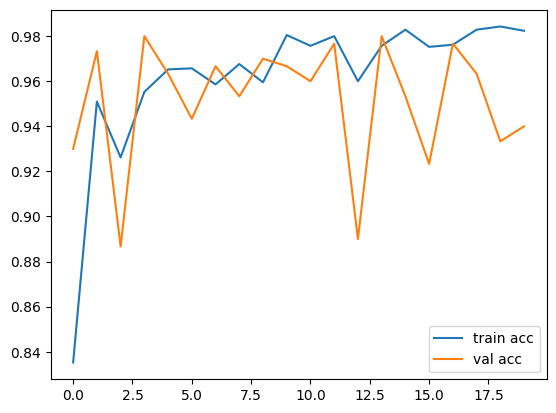

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('inceptionv3_model_potato_disease.h5')
model.save('/content/gdrive/MyDrive/ColabNotebooks/inceptionv3_model_potato_disease.h5')

In [23]:

y_pred = model.predict(test_set)


19/19 [==============================] - 4s 128ms/step


In [21]:
scores=model.evaluate(test_set)

19/19 [==============================] - 237s 13s/step - loss: 0.7811 - accuracy: 0.9400


In [22]:
scores

[0.7811266183853149, 0.9399999976158142]

In [25]:
y_pred

array([[1.0000000e+00, 2.2946304e-27, 0.0000000e+00],
       [1.0000000e+00, 2.3699088e-20, 8.5243333e-31],
       [1.0000000e+00, 3.9008961e-37, 0.0000000e+00],
       ...,
       [1.0022761e-30, 9.9299373e-17, 1.0000000e+00],
       [1.0449319e-25, 1.7822100e-15, 1.0000000e+00],
       [3.4765242e-37, 1.2245721e-14, 1.0000000e+00]], dtype=float32)

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
class_names = list(training_set.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [29]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [30]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in valid_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-32-61a44d95994f>:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set)


Confusion Matrix
Normalized confusion matrix
Classification Report
                       precision    recall  f1-score   support

Potato___Early_blight       0.98      0.96      0.97       200
 Potato___Late_blight       0.86      0.98      0.92       200
     Potato___healthy       0.99      0.88      0.93       200

             accuracy                           0.94       600
            macro avg       0.95      0.94      0.94       600
         weighted avg       0.95      0.94      0.94       600



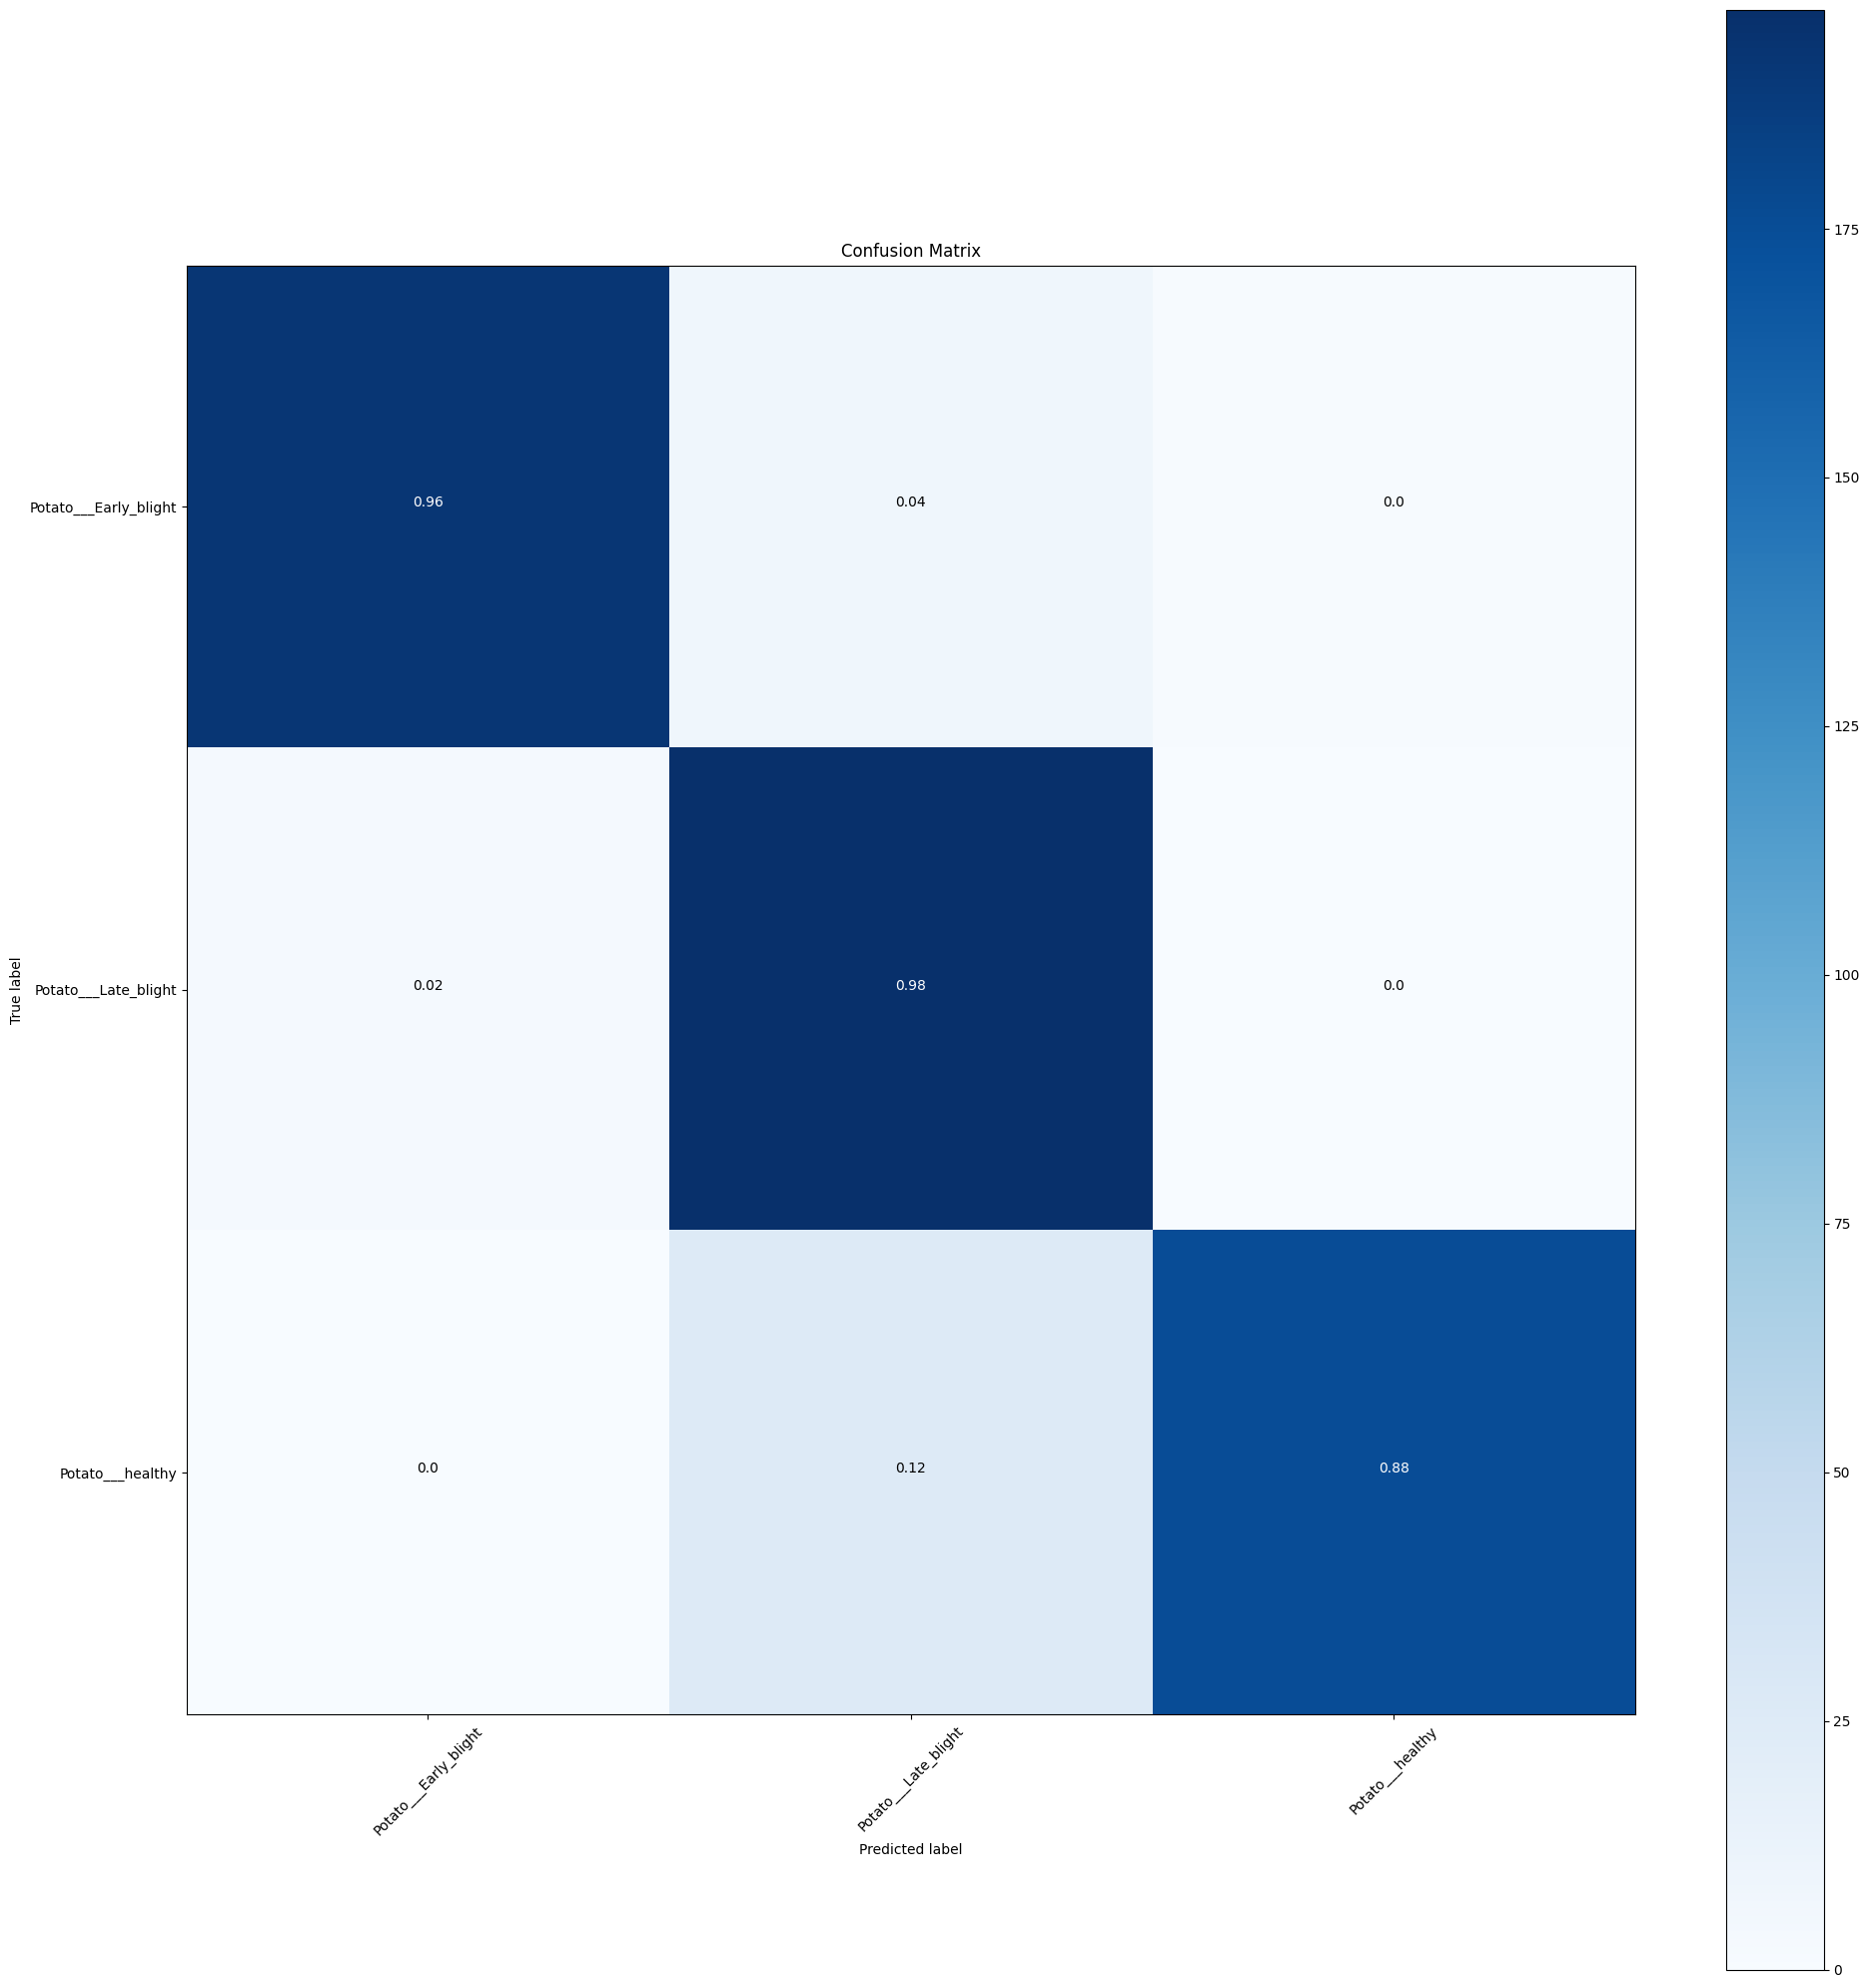

In [32]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in training_set.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))

In [33]:
y_true=test_set.classes

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#get classification report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       200
           1       0.86      0.98      0.92       200
           2       0.99      0.88      0.93       200

    accuracy                           0.94       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.95      0.94      0.94       600



In [35]:
#get confusion matrix
print(confusion_matrix(y_true,y_pred))

[[192   7   1]
 [  3 197   0]
 [  0  25 175]]
